In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.patches as patches
from PIL import Image

In [48]:
# 📤 Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded file name

# Load the original image (no resizing)
original_img = image.load_img(image_path)

Saving _73_2704407.jpg to _73_2704407.jpg


In [49]:
#Resize and preprocess the image
target_size = (224, 224)  # Adjust to match training size
resized_img = image.load_img(image_path, target_size=target_size)  # Resize
img_array = image.img_to_array(resized_img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

In [50]:
for ax in axes:
    ax.axis("off")

plt.show()

In [39]:
model_path = "/content/OCT_model.keras"
model = tf.keras.models.load_model(model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
all_lables = ['normal', 'cataract', 'glaucoma', 'diabetic retinopathy']

In [52]:
img_array = image.img_to_array(resized_img)
img_array = img_array / 255.0
img_array = tf.image.resize(img_array, [50, 50])
img_array = np.expand_dims(img_array, axis=0)
y_pred = model.predict(img_array)
predicted_index = np.argmax(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [53]:
print("Predicted label : ",all_lables[predicted_index])

Predicted label :  glaucoma


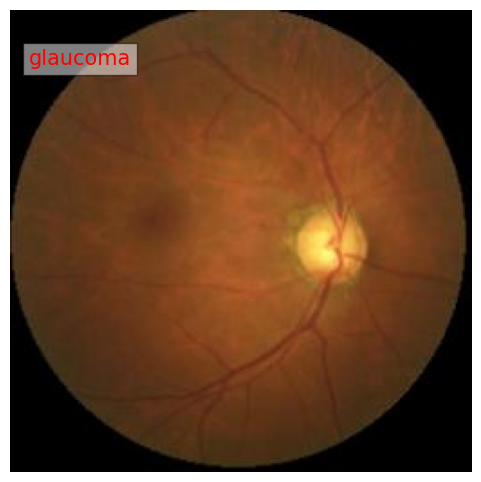

In [54]:
img = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")

text = all_lables[predicted_index]
plt.text(10, 30, text, fontsize=15, color="red", bbox=dict(facecolor="white", alpha=0.5))

plt.show()